# Check Nrrd Resolution

This notebooks checks the resolution of all provided nrrd files.

In [1]:
import monai
import numpy as np

import matplotlib.pyplot as plt

from monai.data import NrrdReader, Dataset
from monai import transforms

import json
import os

from typing import Dict

/media/mavibirdesmi/0F85E95C3B24E86C/Datasets/LABEL DATA_1/

In [2]:
dataset_path = input("Please enter dataset path:\n")

Please enter dataset path:
/media/mavibirdesmi/0F85E95C3B24E86C/Datasets/LABEL DATA_1/


In [3]:
# read json file to get label and image file names
with open(
    os.path.join(
        dataset_path,
        "data.json"
    ),
    "r"
) as json_file:
    dataset_config = json.load(json_file)

In [4]:
print(json.dumps(dataset_config, indent=4))

{
    "ahmet_timur_label": {
        "mri": "21 t1_mprage_tra_p2_iso.nrrd",
        "ground_truth": "Segmentation.seg.nrrd"
    },
    "altun_nurten_label": {
        "mri": "17 t1_mprage_tra_p2_iso.nrrd",
        "ground_truth": "Segmentation.seg.nrrd"
    },
    "cansel_akgun_label": {
        "mri": "40009 ORIG 3D Ax T1 MP-RAGE.nrrd",
        "ground_truth": "Segmentation.seg.nrrd"
    },
    "enver_akkaya_label": {
        "mri": "13 t1_mprage_tra_p2_iso.nrrd",
        "ground_truth": "Segmentation.seg.nrrd"
    },
    "munevver_altan_label": {
        "mri": "22 t1_mprage_tra_p2_iso.nrrd",
        "ground_truth": "Segmentation.seg.nrrd"
    },
    "osman_altintas": {
        "mri": "17 t1_mprage_tra_p2_iso.nrrd",
        "ground_truth": "Segmentation.seg.nrrd"
    },
    "ramazan_acer_label": {
        "mri": "7 t1_mprage_tra_p2_iso.nrrd",
        "ground_truth": "Segmentation.seg.nrrd"
    },
    "salih_adali_label": {
        "mri": "17 t1_mprage_tra_p2_iso.nrrd",
        "groun

In [5]:
def get_file_paths_from_config (dataset_config : Dict):
    file_dictionary = []
    
    for patient_id, patient_data in dataset_config.items():
        file_dictionary.append({
            "image" : os.path.join(dataset_path, patient_id, patient_data["mri"]),
            "label" : os.path.join(dataset_path, patient_id, patient_data["ground_truth"])
        })
    
    return file_dictionary

In [6]:
file_paths = get_file_paths_from_config(dataset_config)
print(file_paths[0])

{'image': '/media/mavibirdesmi/0F85E95C3B24E86C/Datasets/LABEL DATA_1/ahmet_timur_label/21 t1_mprage_tra_p2_iso.nrrd', 'label': '/media/mavibirdesmi/0F85E95C3B24E86C/Datasets/LABEL DATA_1/ahmet_timur_label/Segmentation.seg.nrrd'}


In [7]:
print(Dataset.__doc__)


    A generic dataset with a length property and an optional callable data transform
    when fetching a data sample.
    If passing slicing indices, will return a PyTorch Subset, for example: `data: Subset = dataset[1:4]`,
    for more details, please check: https://pytorch.org/docs/stable/data.html#torch.utils.data.Subset

    For example, typical input data can be a list of dictionaries::

        [{                            {                            {
             'img': 'image1.nii.gz',      'img': 'image2.nii.gz',      'img': 'image3.nii.gz',
             'seg': 'label1.nii.gz',      'seg': 'label2.nii.gz',      'seg': 'label3.nii.gz',
             'extra': 123                 'extra': 456                 'extra': 789
         },                           },                           }]
    


In [8]:
dataset = Dataset(
    data = file_paths,
    transform = transforms.LoadImaged(
        reader = NrrdReader,
        keys=["image", "label"]
    )
)

In [9]:
for idx in range(len(dataset)):
    data, file_path = dataset[idx], dataset.data[idx]
    print(f"{idx}: {file_path['image'].split('/')[-2]}")
    print(f"Image shape: {data['image'].shape}, Label shape: {data['label'].shape}")
    print("")

0: ahmet_timur_label
Image shape: torch.Size([232, 256, 176]), Label shape: torch.Size([232, 256, 176])

1: altun_nurten_label
Image shape: torch.Size([232, 256, 176]), Label shape: torch.Size([2, 232, 256, 176])

2: cansel_akgun_label
Image shape: torch.Size([512, 512, 178]), Label shape: torch.Size([2, 512, 512, 178])

3: enver_akkaya_label
Image shape: torch.Size([232, 256, 176]), Label shape: torch.Size([232, 256, 176])

4: munevver_altan_label
Image shape: torch.Size([232, 256, 176]), Label shape: torch.Size([232, 256, 176])

5: osman_altintas
Image shape: torch.Size([232, 256, 176]), Label shape: torch.Size([232, 256, 176])

6: ramazan_acer_label
Image shape: torch.Size([232, 256, 208]), Label shape: torch.Size([232, 256, 208])

7: salih_adali_label
Image shape: torch.Size([232, 256, 176]), Label shape: torch.Size([232, 256, 176])



We see that there are several images with different resolution:
1. \[232, 256, 176\] 0 1 3 4 5 7
2. \[512, 512, 178\] 2
3. \[232, 256, 208\] 6

Shape of the labels are also same as their respective images, however there are two labels that has an extra dimension. Lets investigate those

In [10]:
image, label = dataset[2]["image"], dataset[2]["label"]

In [11]:
label[1].sum(), label[0].sum()

(tensor(71617.), tensor(9931188.))

In [12]:
i = 1
for shape in label.shape[1:]:
    i *= shape
print(i)

46661632


In [13]:
label[1].unique(), label[0].unique()

(tensor([0., 1.]), tensor([0., 2.]))

image shape: (512, 512, 178)
label shape: (2, 512, 512, 178)


<Figure size 2400x600 with 0 Axes>

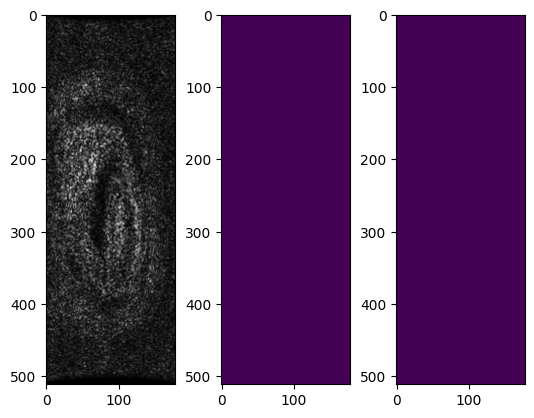

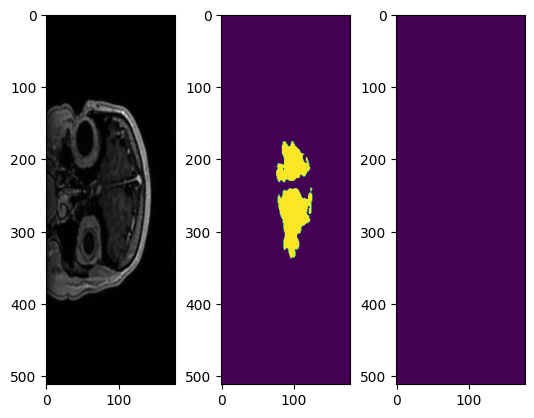

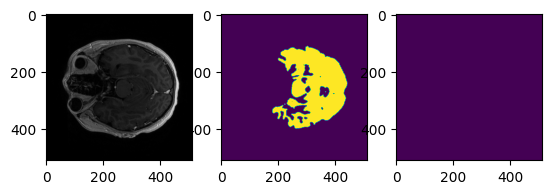

In [14]:
print(f"image shape: {image.array.shape}")
print(f"label shape: {label.array.shape}")
plt.figure("image", (24, 6))

# plot T1 modality
fig, axs = plt.subplots(1, 3)
axs[0].imshow(image.array[60, :, :], cmap="gray")
axs[1].imshow(label.array[0, 60, :, :])
axs[2].imshow(label.array[1, 60, :, :])
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(image.array[:, 120, :], cmap="gray")
axs[1].imshow(label.array[0, :, 120, :])
axs[2].imshow(label.array[1, :, 120, :])
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(image.array[:, :, 60], cmap="gray")
axs[1].imshow(label.array[0, :, :, 60])
axs[2].imshow(label.array[1, :, :, 60])

plt.show()

image shape: (232, 256, 176)
label shape: (2, 232, 256, 176)


<Figure size 2400x600 with 0 Axes>

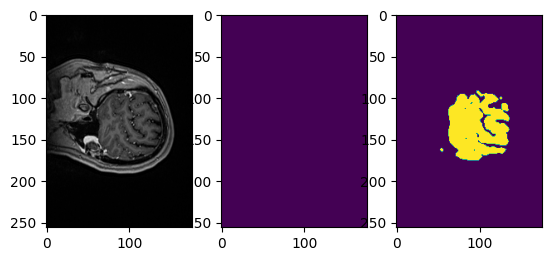

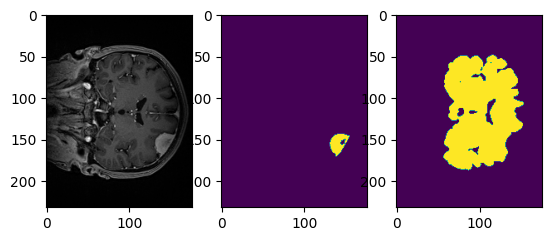

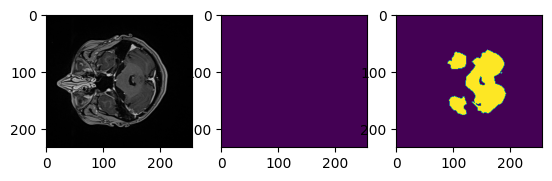

In [15]:
image, label = dataset[1]["image"], dataset[1]["label"]

print(f"image shape: {image.array.shape}")
print(f"label shape: {label.array.shape}")
plt.figure("image", (24, 6))

# plot T1 modality
fig, axs = plt.subplots(1, 3)
axs[0].imshow(image.array[60, :, :], cmap="gray")
axs[1].imshow(label.array[0, 60, :, :])
axs[2].imshow(label.array[1, 60, :, :])
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(image.array[:, 120, :], cmap="gray")
axs[1].imshow(label.array[0, :, 120, :])
axs[2].imshow(label.array[1, :, 120, :])
plt.show()

fig, axs = plt.subplots(1, 3)
axs[0].imshow(image.array[:, :, 60], cmap="gray")
axs[1].imshow(label.array[0, :, :, 60])
axs[2].imshow(label.array[1, :, :, 60])

plt.show()